<IPython.core.display.Javascript object>


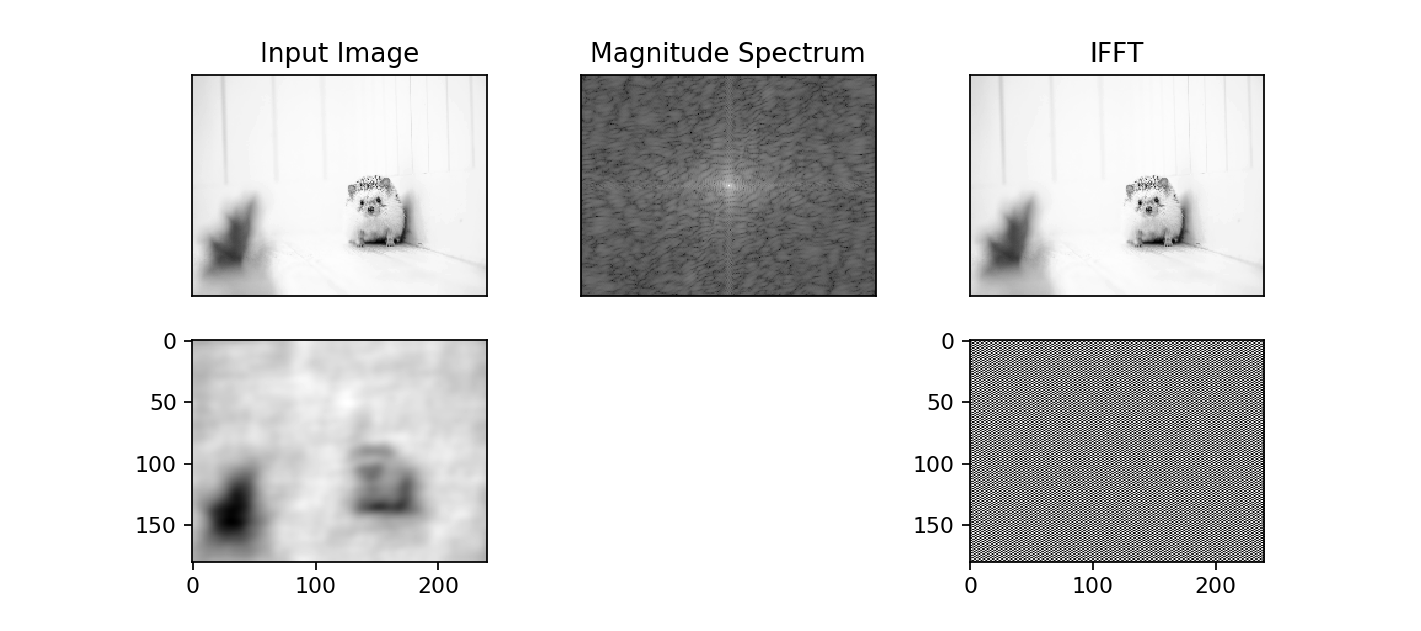

<IPython.core.display.Javascript object>


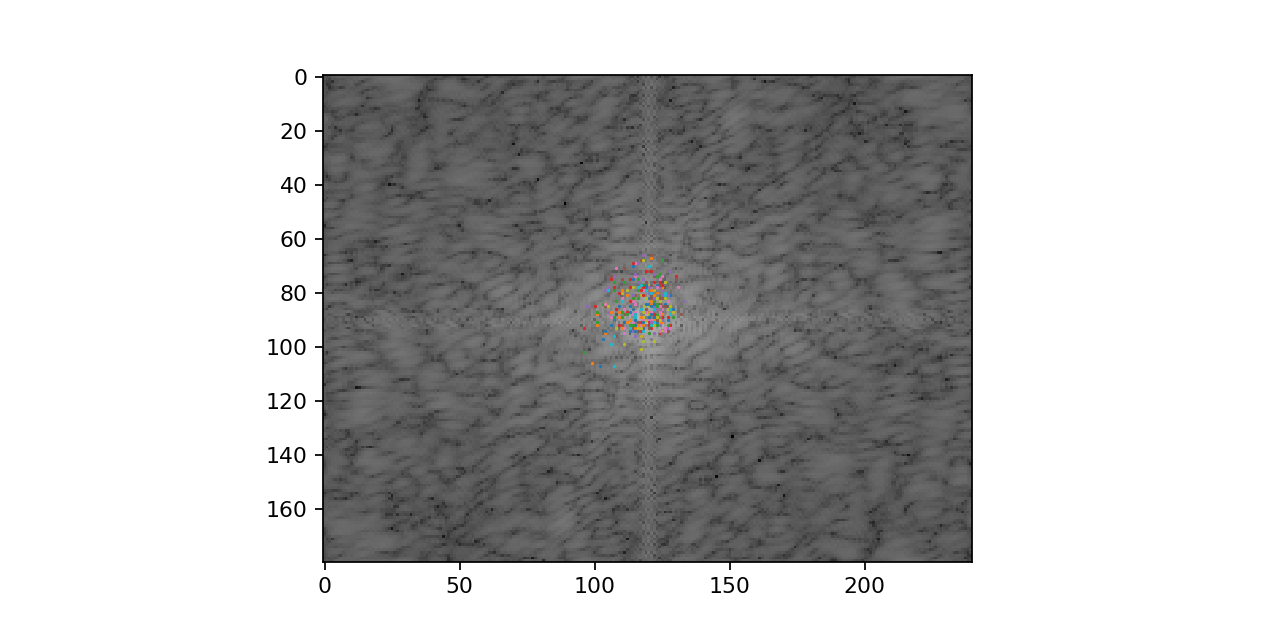

10

In [6]:
# -*- coding: utf-8 -*-
# cv2によるフーリエ変換と逆フーリエ変換
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib notebook 
# inlineで実行するとマウスで選択できないので、notebookで実行する
        
# 画像の読み込み
im = cv2.imread('origin.jpg',0)
# 画像のリサイズ
im = cv2.resize(im,(240,180))

# clicklogの初期化
clicklog = np.zeros(im.shape)

# フーリエ変換
f = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# 逆フーリエ変換
dft_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(dft_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# 過去のクリックした座標のデータを1、それ以外を0で記録
def addClick(x,y,click):
    A = click
    A[y,x] = 1
    return A

# sin波の切り抜き
def mkWave(x, y):
    yahoo=np.zeros(im.shape)
    yahoo[y, x] = 1
    wave = cv2.idft(yahoo)
    return wave

# sin波の合成
def reset(x, y, A):
    google = np.zeros(dft_shift.shape)
    google[:,:,0] = A # Aを1にすると全て選択されたことになり、結果を見ると元に戻ることが分かる
    google[:,:,1] = A # 同上
    copy = dft_shift*google
    copy = np.fft.ifftshift(copy)
    copy = cv2.idft(copy)
    re = cv2.magnitude(copy[:,:,0],copy[:,:,1])
    return re

# クリック時の処理
def onclick(event):
    global clicklog, X, Y
    # 左クリック&ドラッグ時の挙動
    if event.button==1:
        X=int(round(event.xdata))
        Y=int(round(event.ydata))
        
        ax7.plot(X, Y, marker='.', markersize='1')    
        
        clicklog = addClick(X, Y, clicklog)
        
        # リアルタイム表示にするには、以下のコメントアウト&121行目「fig2.canvas.mpl_connect('button_release_event', onrelease)」を解除(高負荷)
#         wave = mkWave(X, Y)
#         ax6.imshow(wave, cmap='gray')
        
#         reim = reset(X, Y, clicklog)
#         reim = np.float32(reim)
#         ax4.imshow(reim, cmap='gray')
        
#         plt.draw()

# qを押したら終了(figure1とfigure2でそれぞれqを押す必要あり)
def onkey(event):
    if event.key == 'q':
        sys.exit()

# 指を離したら計算を実行する(高負荷を回避, リアルタイムではなくなる)
def onrelease(event):
    global clicklog, X, Y
    wave = mkWave(X, Y)
    ax6.imshow(wave, cmap='gray')
    
    reim = reset(X, Y, clicklog)
    reim = np.float32(reim)
    ax4.imshow(reim, cmap='gray')
    
    plt.draw()
    
# figure準備
fig = plt.figure(figsize=(9,4))

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(im, cmap='gray')
ax1.set_title('Input Image')
ax1.set_xticks([]), ax1.set_yticks([])

ax2 = fig.add_subplot(2,3,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.set_title('Magnitude Spectrum')
ax2.set_xticks([]), ax2.set_yticks([])

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(img_back, cmap='gray')
ax3.set_title('IFFT')
ax3.set_xticks([]), ax3.set_yticks([])

ax4 = fig.add_subplot(2,3,4)

ax6 = fig.add_subplot(2,3,6)

fig2=plt.figure(figsize=(8,4))

ax7 = fig2.add_subplot(1,1,1)
ax7.imshow(magnitude_spectrum, cmap='gray')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0)

# マウスイベント
fig2.canvas.mpl_connect('button_press_event', onclick)
fig2.canvas.mpl_connect('motion_notify_event', onclick)
fig2.canvas.mpl_connect('button_release_event', onrelease)
fig2.canvas.mpl_connect('key_press_event', onkey)